### Spatial data analysis in Python

#### Data loading... 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import numpy as np

In [40]:
df = pd.read_csv('ransak_test.csv', sep=',',encoding='cp1251')

In [43]:
ransac = linear_model.RANSACRegressor(residual_threshold=0.5)
def get_line_numbers(data, max_n=2):
    rest_data = data.copy()
    res = 0
    while len(rest_data) > 2:
        x = rest_data.x.values[:, np.newaxis]
        y = rest_data.y.values[:, np.newaxis]
        ransac.fit(x, y)
        inlier_mask = ransac.inlier_mask_
        rest_data = rest_data[~inlier_mask]
        if sum(inlier_mask)>max_n:
            res += 1
    return res
        

In [44]:
for plot in df.Plot.unique():
    data = df[df.Plot==plot]
    try:
        print(f"Plot #{plot}; line Number: {get_line_numbers(data)}; Num of trees {len(data)}")
    except:
        print(f"Wrong data in Plot {plot}")

Plot #1; line Number: 12; Num of trees 78
Plot #2; line Number: 12; Num of trees 72
Plot #3; line Number: 10; Num of trees 59
Plot #4; line Number: 11; Num of trees 73
Plot #5; line Number: 9; Num of trees 53
Plot #6; line Number: 9; Num of trees 52
Plot #7; line Number: 11; Num of trees 68
Plot #8; line Number: 14; Num of trees 90
Plot #9; line Number: 17; Num of trees 131
Plot #10; line Number: 13; Num of trees 142
Plot #11; line Number: 11; Num of trees 131
Plot #12; line Number: 11; Num of trees 129
Plot #13; line Number: 12; Num of trees 75
Plot #14; line Number: 16; Num of trees 99
Plot #15; line Number: 13; Num of trees 76
Plot #16; line Number: 11; Num of trees 63
Plot #17; line Number: 12; Num of trees 74
Plot #18; line Number: 13; Num of trees 81
Plot #19; line Number: 9; Num of trees 45
Plot #21; line Number: 11; Num of trees 60
Plot #20; line Number: 7; Num of trees 32
Plot #22; line Number: 11; Num of trees 65
Plot #23; line Number: 9; Num of trees 52
Plot #24; line Number

#### Data description... 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Plot      4335 non-null   int64  
 1   N         4335 non-null   object 
 2   Species   4335 non-null   object 
 3   x         4335 non-null   float64
 4   y         4335 non-null   float64
 5   D         4334 non-null   object 
 6   H         4334 non-null   object 
 7   Distance  4334 non-null   float64
 8   Angle     4335 non-null   int64  
 9   cex       4335 non-null   object 
 10  shape     4335 non-null   int64  
 11  col       4335 non-null   int64  
 12  Dead      755 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 440.4+ KB


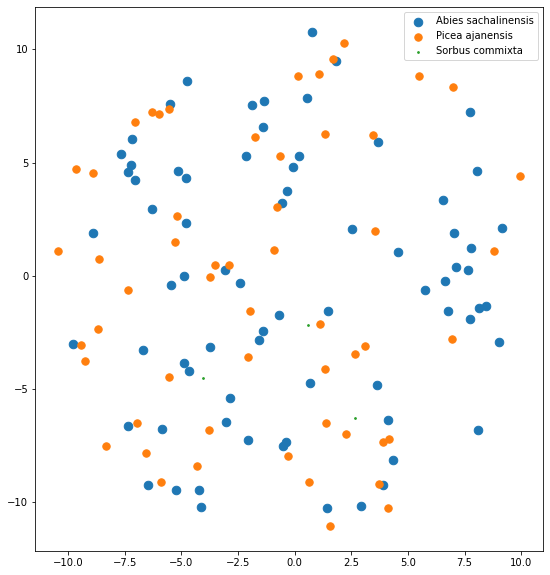

In [192]:
plt.figure(figsize=(10, 10))
for k, v in df.Species.value_counts().to_dict().items():
    dp = df[df.Species == k]
    plt.scatter(dp.x, dp.y, v, label=k)
plt.legend()
plt.gca().set_aspect('equal', 'box')

#### Use RANSAC for  finding the best linear regression fit

In [193]:
 df.Species.value_counts().to_dict()

{'Abies sachalinensis': 73, 'Picea ajanensis': 55, 'Sorbus commixta': 3}

(73, 1)
The number of inlier points: 15
The number of outlier points: 58


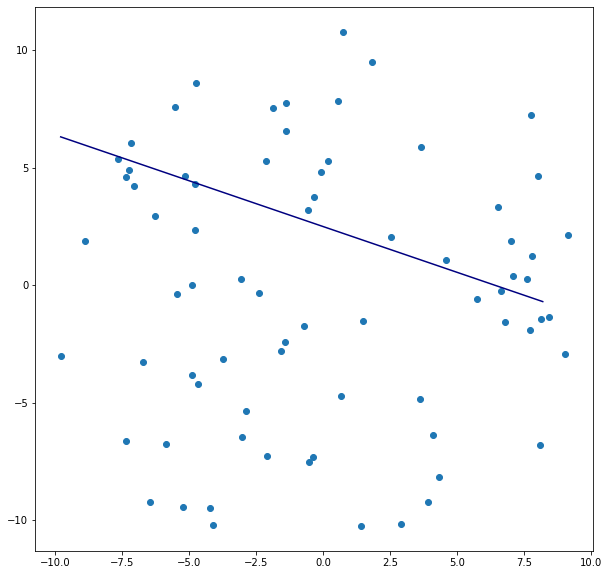

(55, 1)
The number of inlier points: 11
The number of outlier points: 44


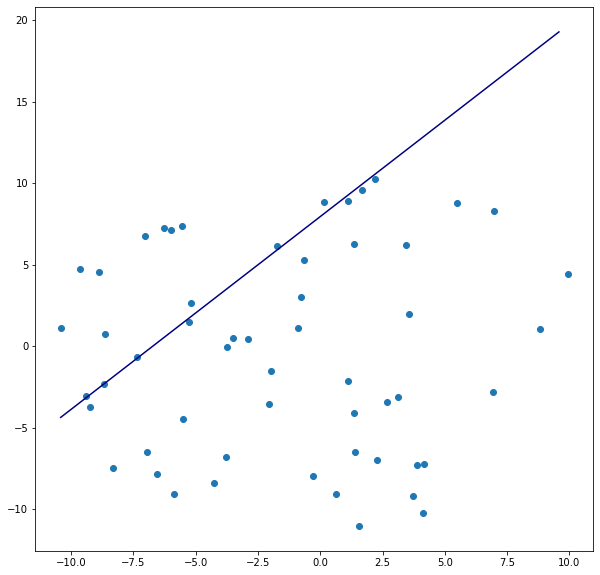

(3, 1)
The number of inlier points: 2
The number of outlier points: 1


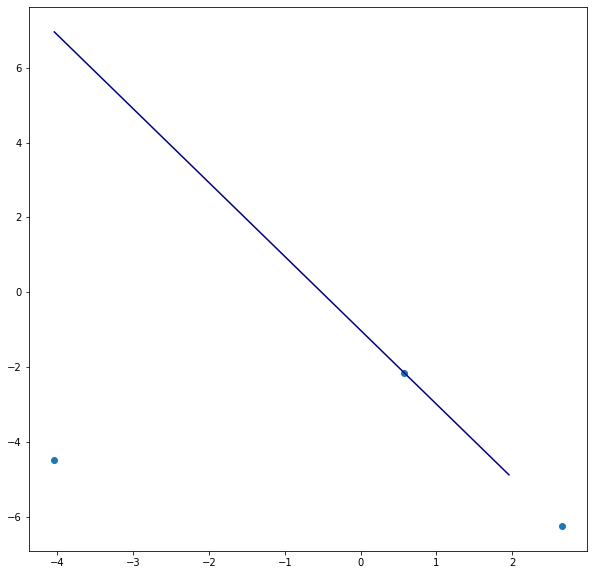

In [194]:
for sp_name in df.Species.unique():
    plt.figure(figsize=(10, 10))
    x = df.x[df.Species == sp_name].values[:, np.newaxis]
    y = df.y[df.Species == sp_name].values[:, np.newaxis]
    print(x.shape)
    ransac = linear_model.RANSACRegressor(residual_threshold=1)
    ransac.fit(x, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    print(f"The number of inlier points: {inlier_mask.sum()}")
    print(f"The number of outlier points: {outlier_mask.sum()}")
    
    line_x = np.arange(x.min(), x.max())[:, np.newaxis]
    line_y_ransac = ransac.predict(line_x)
    plt.plot(x, y, 'o')
    plt.gca().plot(line_x, line_y_ransac, color="navy",  label="Linear regressor")
    plt.show()

In [195]:
def get_circle_coordinates(x1, y1, x2, y2, x3, y3):

    x12 = x1 - x2;
    x13 = x1 - x3;
 
    y12 = y1 - y2;
    y13 = y1 - y3;
 
    y31 = y3 - y1;
    y21 = y2 - y1;
 
    x31 = x3 - x1;
    x21 = x2 - x1;
 
    # x1^2 - x3^2
    sx13 = x1 ** 2 - x3 **2
 
    # y1^2 - y3^2
    sy13 = y1 ** 2 - y3 ** 2
 
    sx21 = x2 ** 2 - x1 ** 2
    sy21 = y2 ** 2 - y1 ** 2
 
    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) / (2 *
          ((y31) * (x12) - (y21) * (x13))));
             
    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) /
          (2 * ((x31) * (y12) - (x21) * (y13))));
 
    c = -(x1 ** 2) - (y1 ** 2) - 2 * g * x1 - 2 * f * y1;
 
    # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
    # where centre is (h = -g, k = -f) and
    # radius r as r^2 = h^2 + k^2 - c
    h = -g;
    k = -f;
    sqr_of_r = h * h + k * k - c;
 
    # r is the radius
    return h, k, sqr_of_r ** 0.5


def p2c_dist(xc, yc, rc, x, y):
    """Distance between circle (xc, yc, rc) and a point (x, y)"""

    return abs(((x - xc) ** 2 + (y - yc) ** 2) ** (1.0 / 2.0) - rc);


def is_data_valid(X, y):
    #print(f"validating: { len(X[:, 0])}")
    if len(X[:, 0]) != 3:
        return False
    else:
        x1, y1, x2, y2, x3, y3 = X[0][0], X[0][1], X[1][0], X[1][1], X[2][0], X[2][1]
        #print(f"Res {x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)}")
        res = abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) > 1.0e-7
        #print(f"{res}")
        return res

In [196]:
from sklearn.base import BaseEstimator, RegressorMixin

class CircularRegressor(BaseEstimator, RegressorMixin):
    
    def fit(self, X, y=None):
        if len(X[:, 0]) >= 3:
            self.xc, self.yc, self.rc = get_circle_coordinates(X[0][0], X[0][1], X[1][0], X[1][1], X[2][0], X[2][1])
            self.points = X.copy()
        else:
            raise ValueError("Hoh")

    
    def predict(self, X, y=None):
        #breakpoint()
        return np.abs(((X[:,0] - self.xc) ** 2 + (X[:,1] - self.yc) ** 2) ** (1.0 / 2.0) - self.rc)
    
    def score(self, X, y=None):
        return len(X[:, 0])

In [197]:
def test_circular_regressor():
    cir_reg = CircularRegressor()
    data = np.array([[0, 3],
                     [3, 0],
                     [3, 6]])
    cir_reg.fit(data)
    assert cir_reg.xc == 3
    assert cir_reg.yc == 3
    assert cir_reg.rc == 3
    print("Tests passed.")

### Fitting data with circular ransac algorithm with threshold

In [198]:
def loss_function(y, y_pred):
    return np.abs(y_pred)

In [206]:
residual_threshold = 0.5
ransac = linear_model.RANSACRegressor(
    base_estimator=CircularRegressor(),
    loss=loss_function,
    max_trials=100000,
    is_data_valid=is_data_valid,
    min_samples=3,
    residual_threshold=residual_threshold
)


In [207]:
data=np.vstack([df.x, df.y]).T
ransac.fit(data, np.zeros_like(data[:, 0]))

RANSACRegressor(base_estimator=CircularRegressor(),
                is_data_valid=<function is_data_valid at 0x0000025F4A4F6438>,
                loss=<function loss_function at 0x0000025F4C2B7948>,
                max_trials=100000, min_samples=3, residual_threshold=0.5)

In [208]:
ransac.inlier_mask_.sum()

27

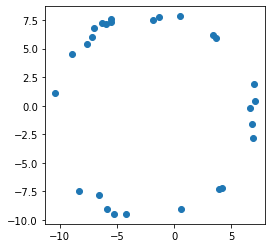

In [209]:
plt.plot(df[ransac.inlier_mask_].x, df[ransac.inlier_mask_].y, 'o')
plt.gca().set_aspect('equal', 'box')
plt.show()

In [210]:
from scipy.optimize import minimize


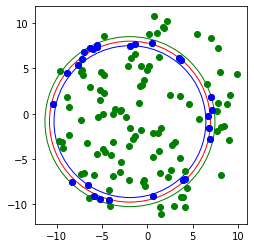

In [211]:
from matplotlib.patches import Circle
plt.plot(df.x, df.y, 'go')
plt.plot(df[ransac.inlier_mask_].x, df[ransac.inlier_mask_].y, 'bo')
def opt_circle(x, data):
    return  np.sum((((data[:,0] - x[0]) ** 2 + (data[:,1] - x[1]) ** 2) ** (1.0 / 2.0) - x[2]) ** 2)

ransac.estimator_.xc, ransac.estimator_.yc, ransac.estimator_.rc = \
minimize(opt_circle, x0=np.array([0,0,0]), args=(np.vstack([df[ransac.inlier_mask_].x, df[ransac.inlier_mask_].y]).T, )).x


plt.gca().add_patch(
    Circle((ransac.estimator_.xc, ransac.estimator_.yc),ransac.estimator_.rc, facecolor='none',  edgecolor='r')
)
plt.gca().add_patch(
    Circle((ransac.estimator_.xc, ransac.estimator_.yc),ransac.estimator_.rc-residual_threshold, facecolor='none',  edgecolor='b')
)
plt.gca().add_patch(
    Circle((ransac.estimator_.xc, ransac.estimator_.yc),ransac.estimator_.rc+residual_threshold, facecolor='none',  edgecolor='g')
)
plt.gca().set_aspect('equal', 'box')

In [212]:
ransac.estimator_.rc

8.87609019040306